### Assignment 01

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### 01 - Impact of Outliers on Linear Regression

Ordinary Least Squares Weights (w): [ 3.91672727 -3.55727273]


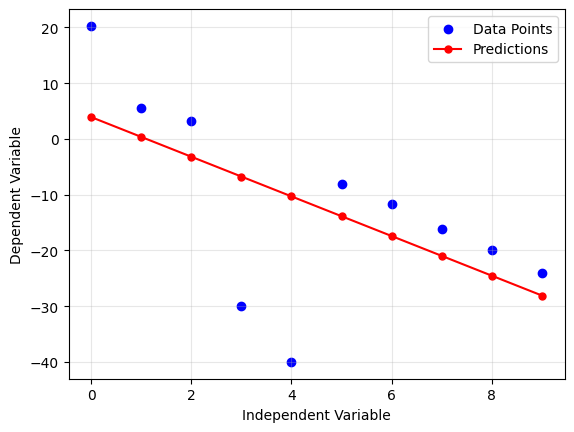

In [2]:
# Load the data set
x = np.arange(10).T
y = np.array([20.26, 5.61, 3.14, -30, -40, -8.13, -11.73, -16.08, -19.95, -24.03]).T

N = len(x)

# Construct a matrix X with each data point in one row, and each column representing a feature
# The first entry of each row will be 1
X = np.ones((N, 2))
X[:, 1] = x

# We want to choose a matrix of weights w such that (y - xW)^T * (y - xW) is minimized
# The w that minimizes the above; the ordinary least squares weights, are given by
w_OLS = np.linalg.inv(X.T @ X) @ X.T @ y

# Print the learned ordinary least squares weights
print ("Ordinary Least Squares Weights (w):", w_OLS)

# Calculate the prediction for each data point based on the learned w
y_hat = X @ w_OLS

# Plot the original data points and the predicted values
plt.scatter(x, y, label='Data Points', color='blue')
plt.plot(y_hat, label='Predictions', color='red', markevery=x, marker='o', markersize=5)

plt.legend()
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.grid(True, alpha=0.3)

plt.show()

Model 1 : [12 -4]
	 Loss for beta = 1      : 0.435416262490386
	 Loss for beta = 1e-06  : 0.9999999998258207
	 Loss for beta = 1000.0 : 0.0002268287498440988
Model 2 : [ 3.91 -3.55]
	 Loss for beta = 1      : 0.9728470518681676
	 Loss for beta = 1e-06  : 0.9999999999999718
	 Loss for beta = 1000.0 : 0.00018824684654645654


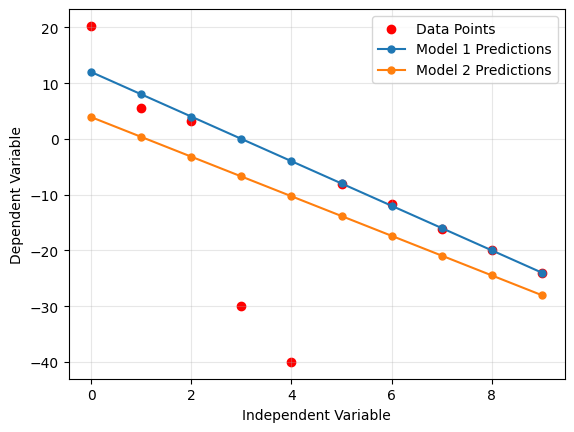

In [3]:
# Plot the raw data points
plt.scatter(x, y, label='Data Points', color='red')

# Set up the weight vectors representing the two given modelss
w_1 = np.array([12, -4])
w_2 = np.array([3.91, -3.55])

models = [w_1, w_2]

# Iterate through each model
for i in range(2):
    w = models[i]
    print ("Model", i + 1, ":", w)

    # Run the model on the data and find the residuals
    y_hat = X @ w
    residuals = y - y_hat

    # Plot the values predicted by the model
    plt.plot(y_hat, label='Model ' + str(i + 1) + ' Predictions', markevery=x, marker='o', markersize=5)

    # Vary beta through each of the given values and find the loss
    for beta in [1, 1E-6, 1E3]:
        loss = (1 / N) * np.sum((residuals ** 2) / (residuals ** 2 + beta ** 2))
        print ("\t Loss for beta =", "{:<6}".format(beta), ":", loss)

plt.legend()
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.grid(True, alpha=0.3)

plt.show()

#### 02 - Loss Functions

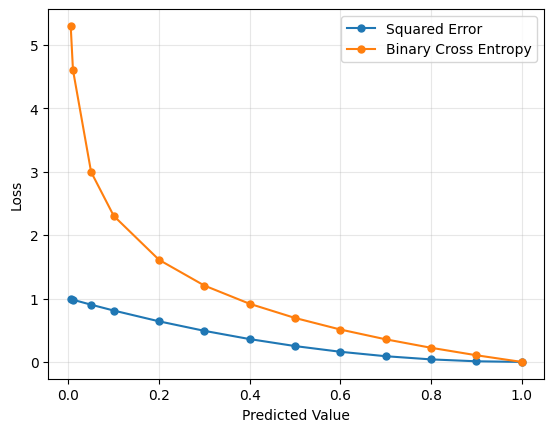

In [4]:
# Load the given predicted values
y_hat = np.array([0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

# Find the squared errors
SE = (1 - y_hat) ** 2

# Find the binary cross entropies
BCE = -np.log(y_hat)

# Plot the variation of the loss over a predicted value when the true value is 1
plt.plot(y_hat, SE, label='Squared Error', marker='o', markersize=5)
plt.plot(y_hat, BCE, label='Binary Cross Entropy', marker='o', markersize=5)

plt.legend()
plt.xlabel('Predicted Value')
plt.ylabel('Loss')
plt.grid(True, alpha=0.3)

plt.show()

#### 03 - Data Pre-Processing

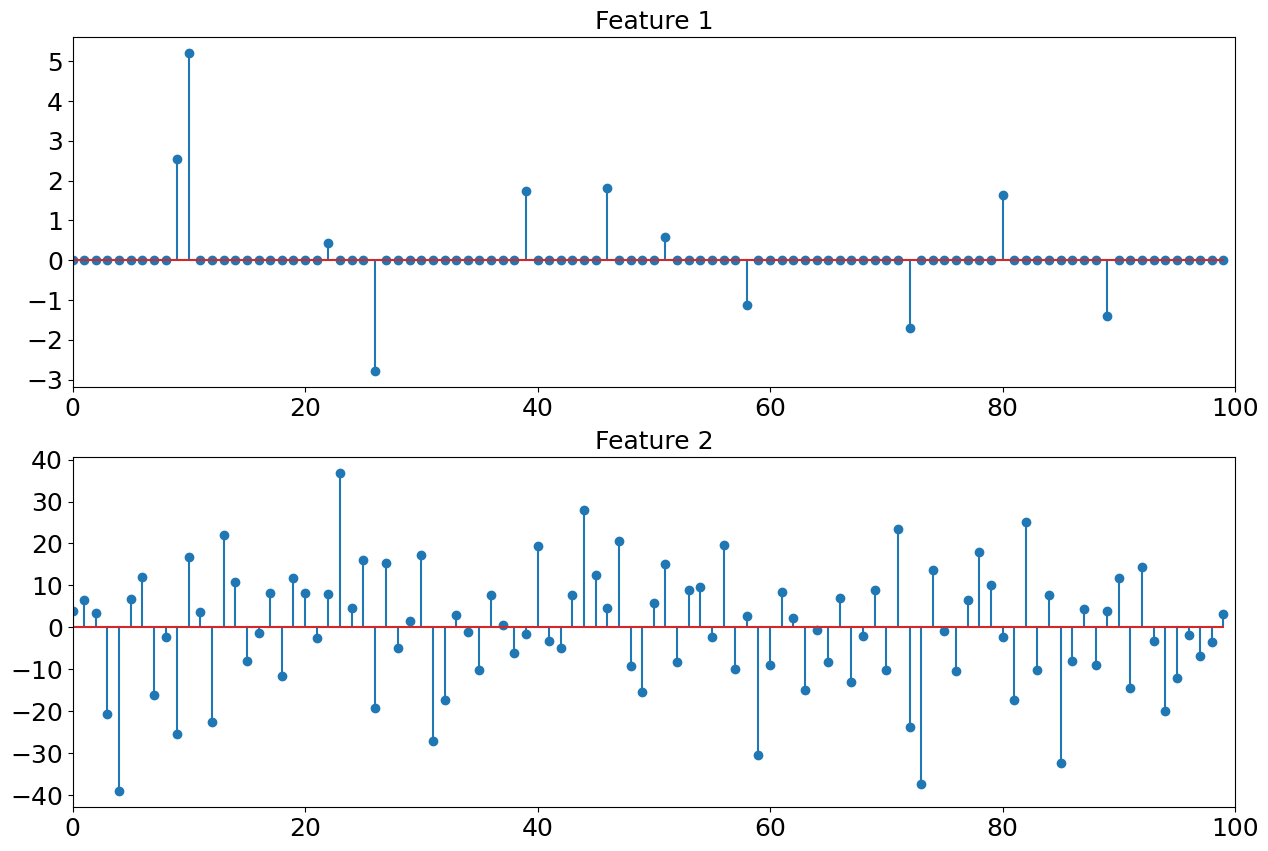

In [ ]:
# Given code
def generate_signal (signal_length , num_nonzero):
    signal = np.zeros(signal_length)
    
    nonzero_indices = np.random.choice(signal_length, num_nonzero, replace = False)
    nonzero_values = 10* np.random.randn(num_nonzero)
    
    signal[nonzero_indices] = nonzero_values
    
    return signal

signal_length = 100 # Total length of the signal
num_nonzero = 10 # Number of non - zero elements in the signal
your_index_no = 220658 # Enter your index no. without english letters and without leading zeros

sparse_signal = generate_signal(signal_length, num_nonzero)
sparse_signal[10] = (your_index_no % 10) * 2 + 10

if your_index_no % 10 == 0:
    sparse_signal[10] = np.random.randn(1) + 30

sparse_signal = sparse_signal / 5

epsilon = np.random.normal (0, 15, signal_length)
# epsilon = epsilon[:, np.newaxis]

plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
plt.title("Feature 1", fontsize=18)
plt.xlim(0, signal_length)
plt.xticks(fontsize=18) # Adjust x - axis tick label font size
plt.yticks(fontsize=18)
plt.stem(sparse_signal)

plt.subplot(2, 1, 2)
plt.title("Feature 2", fontsize=18)
plt.xlim(0, signal_length)
plt.xticks(fontsize=18) # Adjust x - axis tick label font size
plt.yticks(fontsize=18)
plt.stem(epsilon)

plt.show()

In [ ]:
def print_summary_statistics(feature):
    mean = np.mean(feature)
    std_dev = np.std(feature)
    maximum = np.max(feature)
    minimum = np.min(feature)
    range_ = maximum - minimum

    print ("\t Mean \t\t\t:", mean)
    print ("\t Standard Deviation \t:", std_dev)
    print ("\t Maximum \t\t:", maximum)
    print ("\t Minimum \t\t:", minimum)
    print ("\t Range \t\t\t:", range_)

for i in range(2):
    feature = [sparse_signal, epsilon][i]

    print ("Feature", i + 1)
    print_summary_statistics(feature)
    

Feature 1
	 Mean 			: 0.06963158220374253
	 Standard Deviation 	: 0.751690461643816
	 Maximum 		: 5.2
	 Minimum 		: -2.790493210023752
	 Range 			: 7.990493210023752
Feature 2
	 Mean 			: -0.45935709567298505
	 Standard Deviation 	: 14.351150951654933
	 Maximum 		: 36.752574877667975
	 Minimum 		: -39.11938330852965
	 Range 			: 75.87195818619762


Feature 1 - Max-Abs Scaled
	 Mean 			: 0.013390688885335105
	 Standard Deviation 	: 0.14455585800842619
	 Maximum 		: 1.0
	 Minimum 		: -0.5366333096199523
	 Range 			: 1.5366333096199523
Feature 2 - Max-Abs Scaled
	 Mean 			: -0.01174244215585131
	 Standard Deviation 	: 0.36685524509599793
	 Maximum 		: 0.9394978082298754
	 Minimum 		: -1.0
	 Range 			: 1.9394978082298753


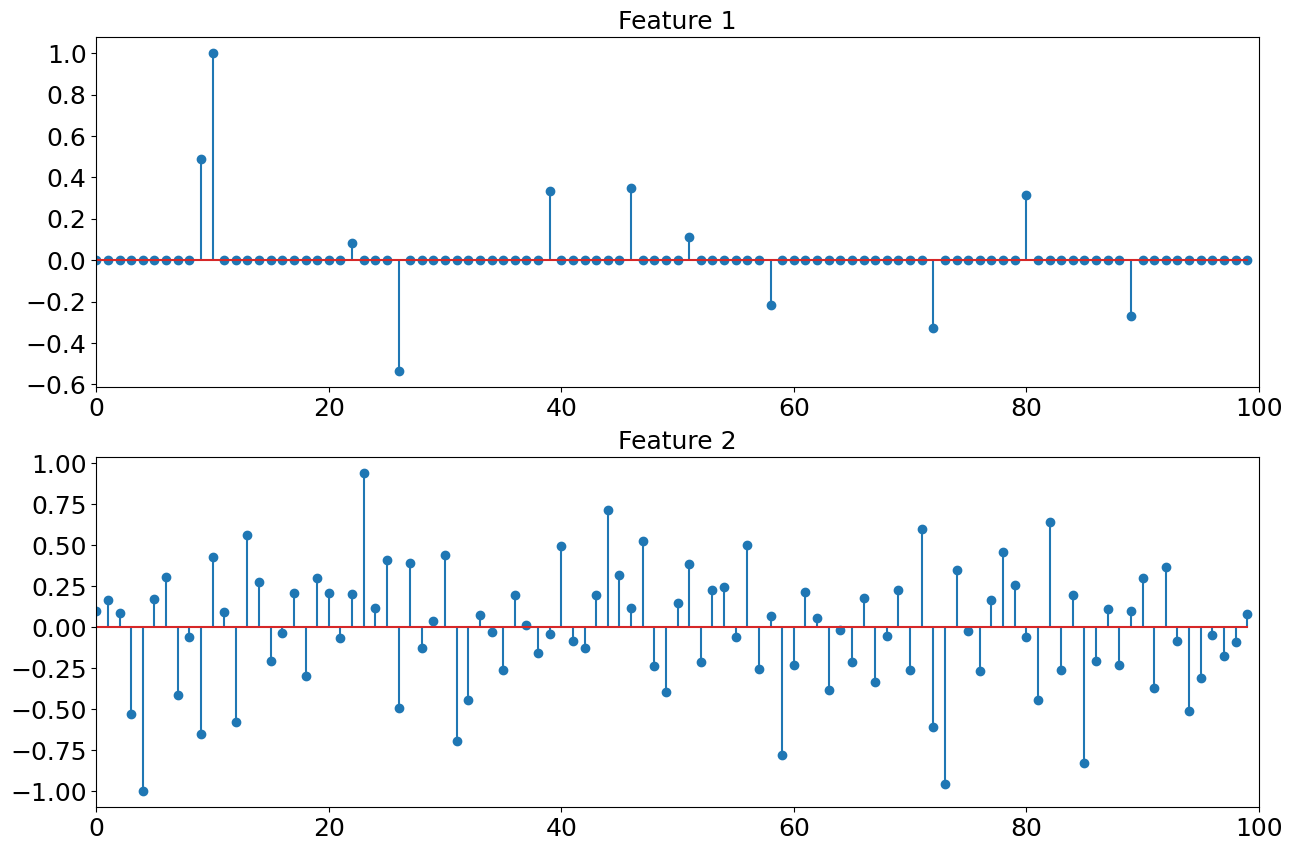

In [20]:
def max_abs_scale(feature):
    max_abs = np.max(np.abs(feature))
    if max_abs == 0:
        return feature  # Avoid division by zero
    return feature / max_abs

plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
plt.title("Feature 1", fontsize=18)
plt.xlim(0, signal_length)
plt.xticks(fontsize=18) # Adjust x - axis tick label font size
plt.yticks(fontsize=18)
plt.stem(max_abs_scale(sparse_signal))

print ("Feature 1 - Max-Abs Scaled")
print_summary_statistics(max_abs_scale(sparse_signal))

plt.subplot(2, 1, 2)
plt.title("Feature 2", fontsize=18)
plt.xlim(0, signal_length)
plt.xticks(fontsize=18) # Adjust x - axis tick label font size
plt.yticks(fontsize=18)
plt.stem(max_abs_scale(epsilon))

print ("Feature 2 - Max-Abs Scaled")
print_summary_statistics(max_abs_scale(epsilon))

plt.show()